In [ ]:
# first importing libraries
import base64
import requests
import numpy as np
import gdown
from zipfile import ZipFile
import os

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import pandas as pd
from torchvision.io import read_image
import re
import cv2
from skimage.transform import resize
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from torch.optim import lr_scheduler


from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

import time
import os
import copy
import string

from nltk.corpus import stopwords
import nltk
import itertools
nltk.download('stopwords')



import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
  
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import GridSearchCV


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
!git clone https://github.com/XL2248/MSCTD.git

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 25.83 MiB/s, done.
Resolving deltas: 100% (617/617), done.
Updating files: 100% (934/934), done.


In [ ]:
with open('/content/MSCTD/MSCTD_data/ende/english_train.txt') as f:
    text_file = [line.rstrip('\n') for line in f]

In [ ]:
print(f'all possible punctuations = {string.punctuation}')
punc_remove = string.punctuation
remove_translate = str.maketrans('', '', string.punctuation)


all possible punctuations = !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
text_train_processed = []
for txt in text_file:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  txt = txt.split()
  filtered_words = [word for word in txt if word not in stopwords.words('english')]
  text_final = " ".join(filtered_words)
  text_train_processed.append(text_final)

  


In [ ]:
print('original text:')
print(text_file[20])
print('processed text:')
print(text_train_processed[20])

original text:
oh, well, that never works.
processed text:
oh well never works


In [ ]:
# we do same for test and validation
with open('/content/MSCTD/MSCTD_data/ende/english_dev.txt') as f:
    text_file_dev = [line.rstrip('\n') for line in f]
text_dev_processed = []
for txt in text_file_dev:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  txt = txt.split()
  filtered_words = [word for word in txt if word not in stopwords.words('english')]
  text_final = " ".join(filtered_words)
  text_dev_processed.append(text_final)

# we do same for test and validation
with open('/content/MSCTD/MSCTD_data/ende/english_test.txt') as f:
    text_file_test = [line.rstrip('\n') for line in f]
text_test_processed = []
for txt in text_file_test:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  txt = txt.split()
  filtered_words = [word for word in txt if word not in stopwords.words('english')]
  text_final = " ".join(filtered_words)
  text_test_processed.append(text_final)


In [ ]:
print('original text:')
print(text_file_dev[20])
print('processed text:')
print(text_dev_processed[20])
print('\n')
print('original text:')
print(text_file_test[20])
print('processed text:')
print(text_test_processed[20])

original text:
We're just traveling mates.
processed text:
traveling mates


original text:
Have you named him yet?
processed text:
named yet


In [ ]:
# loading sentiments
with open('/content/MSCTD/MSCTD_data/ende/sentiment_train.txt') as f:
  sentiment_train = [int(line.rstrip('\n')) for line in f]
with open('/content/MSCTD/MSCTD_data/ende/sentiment_dev.txt') as f:
  sentiment_dev = [int(line.rstrip('\n')) for line in f]
with open('/content/MSCTD/MSCTD_data/ende/sentiment_test.txt') as f:
  sentiment_test = [int(line.rstrip('\n')) for line in f]

implementing tf-idf using sklearn

testing simple linear svm on proccesed and normal text to compare them, then we use grid search to find best model

In [ ]:
print(" TFIDF Vectorizer…… ")
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(text_train_processed)
tf_x_dev = vectorizer.transform(text_dev_processed)
tf_x_test = vectorizer.transform(text_test_processed)

 TFIDF Vectorizer…… 


In [ ]:
print(f'shape of TF-IDF for train data = {np.shape(tf_x_train)}')

shape of TF-IDF for train data = (20240, 10180)


In [ ]:
clf = LinearSVC(random_state=0)
clf.fit(tf_x_train,sentiment_train)


LinearSVC(random_state=0)

In [ ]:
y_dev_pred=clf.predict(tf_x_dev)
report=classification_report(sentiment_dev, y_dev_pred,output_dict=True)
print(report)

{'0': {'precision': 0.4715138361367336, 'recall': 0.48902644907146875, 'f1-score': 0.48011049723756904, 'support': 1777}, '1': {'precision': 0.5068897637795275, 'recall': 0.5603917301414582, 'f1-score': 0.5322997416020672, 'support': 1838}, '2': {'precision': 0.5109427609427609, 'recall': 0.4191988950276243, 'f1-score': 0.460546282245827, 'support': 1448}, 'accuracy': 0.49496346039897293, 'macro avg': {'precision': 0.49644878695300737, 'recall': 0.48953902474685035, 'f1-score': 0.4909855070284877, 'support': 5063}, 'weighted avg': {'precision': 0.4956327455040223, 'recall': 0.49496346039897293, 'f1-score': 0.4934612473528969, 'support': 5063}}


for normal text

In [ ]:
text_train_normal = []
for txt in text_file:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  text_train_normal.append(txt)


text_dev_normal = []
for txt in text_file_dev:
  txt = txt.translate(remove_translate)
  txt = txt.lower()
  text_dev_normal.append(text_final)

vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(text_train_normal)
tf_x_dev = vectorizer.transform(text_dev_normal)

clf = LinearSVC(random_state=0)
clf.fit(tf_x_train,sentiment_train)

y_dev_pred=clf.predict(tf_x_dev)
report=classification_report(sentiment_dev, y_dev_pred,output_dict=True)
print(report)

{'0': {'precision': 0.35097768121666995, 'recall': 1.0, 'f1-score': 0.5195906432748537, 'support': 1777}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1838}, '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1448}, 'accuracy': 0.35097768121666995, 'macro avg': {'precision': 0.11699256040555665, 'recall': 0.3333333333333333, 'f1-score': 0.1731968810916179, 'support': 5063}, 'weighted avg': {'precision': 0.1231853327122304, 'recall': 0.35097768121666995, 'f1-score': 0.1823647191584861, 'support': 5063}}


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
np.shape(tf_x_train)

(20240, 10311)

as we can see, when we pre process data (removing stop words) performance becomes much better, so this way we proved that we need to remove these stop words, so from here forward we only use pre processed data

In [ ]:
print(" TFIDF Vectorizer…… ")
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(text_train_processed)
tf_x_dev = vectorizer.transform(text_dev_processed)
tf_x_test = vectorizer.transform(text_test_processed)

 TFIDF Vectorizer…… 


In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(tf_x_train, sentiment_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.408 total time=  24.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.402 total time=  24.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.417 total time=  24.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.411 total time=  24.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.408 total time=  24.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.390 total time=  25.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.393 total time=  24.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.395 total time=  24.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.392 total time=  24.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.392 total time=  24.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.387 total time=  24.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
grid_predictions_train = grid.predict(tf_x_train)
grid_predictions_validation = grid.predict(tf_x_dev)
grid_predictions_test = grid.predict(tf_x_test)


In [ ]:
acc_train = accuracy_score(sentiment_train,grid_predictions_train)
f1_train = f1_score(sentiment_train, grid_predictions_train, average="macro")
pre_train = precision_score(sentiment_train, grid_predictions_train, average="macro")
recall_train = recall_score(sentiment_train, grid_predictions_train, average="macro")

In [ ]:
print(f"accuracy score on train data: {acc_train}")
print(f"f1 score on train data: {f1_train}")
print(f"precision score on train data: {pre_train}")
print(f"recall score on train data: {recall_train}")

accuracy score on train data: 0.8638833992094862
f1 score on train data: 0.861537768684803
precision score on train data: 0.872976718547341
recall score on train data: 0.8555714482399321


Text(0.5, 1.0, 'confusion matrix for train data')

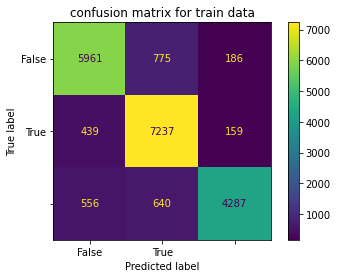

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(sentiment_train, grid_predictions_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for train data')

In [ ]:
acc_dev = accuracy_score(sentiment_dev,grid_predictions_validation)
f1_dev = f1_score(sentiment_dev, grid_predictions_validation, average="macro")
pre_dev = precision_score(sentiment_dev, grid_predictions_validation, average="macro")
recall_dev = recall_score(sentiment_dev, grid_predictions_validation, average="macro")

In [ ]:
print(f"accuracy score on validation data: {acc_dev}")
print(f"f1 score on validation data: {f1_dev}")
print(f"precision score on validation data: {pre_dev}")
print(f"recall score on validation data: {recall_dev}")

accuracy score on validation data: 0.4973335966818092
f1 score on validation data: 0.48446573114662045
precision score on validation data: 0.5124741357148218
recall score on validation data: 0.4853413752912621


Text(0.5, 1.0, 'confusion matrix for validation data')

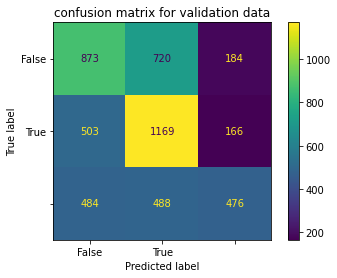

In [ ]:
confusion_matrix = metrics.confusion_matrix(sentiment_dev, grid_predictions_validation)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for validation data')

and finally for test data

In [ ]:
acc_test = accuracy_score(sentiment_test,grid_predictions_test)
f1_test = f1_score(sentiment_test, grid_predictions_test, average="macro")
pre_test = precision_score(sentiment_test, grid_predictions_test, average="macro")
recall_test = recall_score(sentiment_test, grid_predictions_test, average="macro")

In [ ]:
print(f"accuracy score on validation data: {acc_test}")
print(f"f1 score on validation data: {f1_test}")
print(f"precision score on validation data: {pre_test}")
print(f"recall score on validation data: {recall_test}")

accuracy score on validation data: 0.5101638050128281
f1 score on validation data: 0.4910082155590583
precision score on validation data: 0.5210587484915387
recall score on validation data: 0.4956507292262362


Text(0.5, 1.0, 'confusion matrix for test data')

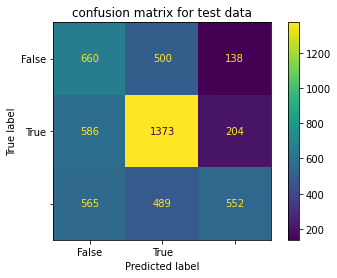

In [ ]:
confusion_matrix = metrics.confusion_matrix(sentiment_test, grid_predictions_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for test data')

we also try logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,solver='saga')
clf.fit(tf_x_train,sentiment_train)
grid_predictions_train = clf.predict(tf_x_train)
grid_predictions_validation = clf.predict(tf_x_dev)
grid_predictions_test = clf.predict(tf_x_test)


accuracy score on train data: 0.7193675889328063
f1 score on train data: 0.7110595440968063
precision score on train data: 0.7253056289674813
recall score on train data: 0.7066933773299416


Text(0.5, 1.0, 'confusion matrix for train data')

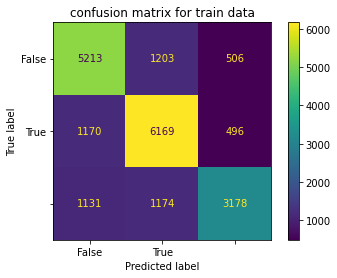

In [ ]:
acc_train = accuracy_score(sentiment_train,grid_predictions_train)
f1_train = f1_score(sentiment_train, grid_predictions_train, average="macro")
pre_train = precision_score(sentiment_train, grid_predictions_train, average="macro")
recall_train = recall_score(sentiment_train, grid_predictions_train, average="macro")
print(f"accuracy score on train data: {acc_train}")
print(f"f1 score on train data: {f1_train}")
print(f"precision score on train data: {pre_train}")
print(f"recall score on train data: {recall_train}")
confusion_matrix = metrics.confusion_matrix(sentiment_train, grid_predictions_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for train data')

accuracy score on validation data: 0.5074066758838633
f1 score on validation data: 0.4998650008360566
precision score on validation data: 0.515309611662341
recall score on validation data: 0.4984498770502899


Text(0.5, 1.0, 'confusion matrix for validation data')

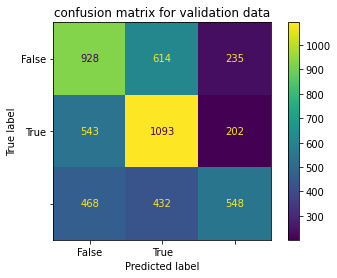

In [ ]:
acc_dev = accuracy_score(sentiment_dev,grid_predictions_validation)
f1_dev = f1_score(sentiment_dev, grid_predictions_validation, average="macro")
pre_dev = precision_score(sentiment_dev, grid_predictions_validation, average="macro")
recall_dev = recall_score(sentiment_dev, grid_predictions_validation, average="macro")
print(f"accuracy score on validation data: {acc_dev}")
print(f"f1 score on validation data: {f1_dev}")
print(f"precision score on validation data: {pre_dev}")
print(f"recall score on validation data: {recall_dev}")

confusion_matrix = metrics.confusion_matrix(sentiment_dev, grid_predictions_validation)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for validation data')

accuracy score on validation data: 0.5083876060785475
f1 score on validation data: 0.49532837693401754
precision score on validation data: 0.5145181606851917
recall score on validation data: 0.49942611693295275


Text(0.5, 1.0, 'confusion matrix for test data')

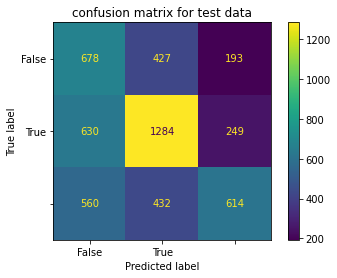

In [ ]:
acc_test = accuracy_score(sentiment_test,grid_predictions_test)
f1_test = f1_score(sentiment_test, grid_predictions_test, average="macro")
pre_test = precision_score(sentiment_test, grid_predictions_test, average="macro")
recall_test = recall_score(sentiment_test, grid_predictions_test, average="macro")
print(f"accuracy score on validation data: {acc_test}")
print(f"f1 score on validation data: {f1_test}")
print(f"precision score on validation data: {pre_test}")
print(f"recall score on validation data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(sentiment_test, grid_predictions_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('confusion matrix for test data')

results are close, but overall it seems that using svm is better and have higher accuracy but not by a large margin

### word2vec like vectors

for this part, we first need to reduce size of feature vecotrs, for this purpose we use auto encoder and then use encoder part to reduce dimension and train our embedding vector

In [ ]:
train_auto_encoder = tf_x_train.T
train_auto_encoder = train_auto_encoder.toarray()
print(f'shape of input = {np.shape(train_auto_encoder)}')
val_auto_encoder = tf_x_dev.T



shape of input = (10180, 20240)


for every word we have a feature vectore and it's size is equal to number of text in train data(its big but its sparse) so we train autoencoder to reduce features to desired number

In [ ]:
import keras
from keras import layers
import tensorflow as tf
class auto_encoder:
  def __init__(self, bottleneck_dim,num_epoch,dim_input):
    self.bottleneck_dim = bottleneck_dim
    self.num_epoch = num_epoch
    self.dim_input = dim_input
  def creat_model(self):
    input = layers.Input(shape=(self.dim_input,))
    e = layers.Dense(1280,activation='selu',name = 'encoder1')(input)
    #e = layers.BatchNormalization()(e)
    # encoder level 2
    e = layers.Dense(640,activation='selu',name = 'encoder2')(e)
    #e = layers.BatchNormalization()(e)
    # bottleneck
    bottleneck = layers.Dense(self.bottleneck_dim,activation='selu',name = 'bottleneck')(e)

    d = layers.Dense(640,activation='selu',name = 'decoder1')(bottleneck)
    #d = layers.BatchNormalization()(d)
    # decoder level 2
    d = layers.Dense(1280,activation='selu',name='decoder2')(d)
    #d = layers.BatchNormalization()(d)
    # output layer
    output = layers.Dense(self.dim_input, activation='relu')(d) #outputs are always positive, because of that we use relu for output activation
    self.model = keras.Model(input, output)
  def train_model(self,X_train,y_train,X_test,y_test):
    self.model.compile(optimizer='adam', loss='mse',)

    history = self.model.fit(X_train, y_train,
                    epochs=self.num_epoch,
                    batch_size=256,
                    shuffle=True,
                  
                    validation_data=(X_test, y_test))
    return history,self.model
  

In [ ]:
n1,n2 = np.shape(train_auto_encoder)
encoder_model = auto_encoder(200,5,n2)
encoder_model.creat_model()
history,autoencoder = encoder_model.train_model(train_auto_encoder,train_auto_encoder,train_auto_encoder,train_auto_encoder)


Epoch 1/5
40/40 [==============================] - 86s 2s/step - loss: 1.5562e-04 - val_loss: 1.1122e-04
Epoch 2/5
40/40 [==============================] - 72s 2s/step - loss: 1.0200e-04 - val_loss: 9.6269e-05
Epoch 3/5
40/40 [==============================] - 70s 2s/step - loss: 9.6340e-05 - val_loss: 9.6308e-05
Epoch 4/5
40/40 [==============================] - 71s 2s/step - loss: 9.6330e-05 - val_loss: 9.6302e-05
Epoch 5/5
40/40 [==============================] - 70s 2s/step - loss: 9.6309e-05 - val_loss: 9.6292e-05


In [ ]:
encoder = keras.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('bottleneck').output) # if we want encoder part separatly


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') # we use google drive to load files and save models there! so change path files based on your own data and run the code!

Mounted at /content/gdrive


In [ ]:
encoder.save("/content/gdrive/MyDrive/Phase_2_models/model.h5")

In [ ]:
# load and evaluate a saved model
from tensorflow.keras.models import load_model
encoder_loaded = load_model("/content/gdrive/MyDrive/Phase_2_models/model.h5")


In [ ]:
encoded_output = encoder(train_auto_encoder)

In [ ]:
np.shape(encoded_output)

TensorShape([10180, 200])

In [ ]:
from numpy import save
save('/content/gdrive/MyDrive/Phase_2_models/data.npy', encoded_output)

In [ ]:
from numpy import load

data = load('/content/gdrive/MyDrive/Phase_2_models/data.npy')

In [ ]:
np.shape(data)

(10180, 200)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


In [ ]:
text_train_processed_es = text_train_processed
for i in range(len(text_train_processed)):
  text_train_processed[i] =  '<shr> ' + "".join(text_train_processed[i]) + ' <pia>'

In [ ]:
tokenizer = Tokenizer(oov_token='<oov>',num_words=10180)
tokenizer.fit_on_texts(text_train_processed)
vocab_size = len(tokenizer.word_index)+1
print(f"number of unique word in our created vocabulary = {vocab_size}")
print(tokenizer.word_index)

number of unique word in our created vocabulary = 10210
{'<oov>': 1, 'shr': 2, 'pia': 3, 'im': 4, 'know': 5, 'dont': 6, 'like': 7, 'get': 8, 'oh': 9, 'right': 10, 'well': 11, 'youre': 12, 'okay': 13, 'yeah': 14, 'go': 15, 'one': 16, 'got': 17, 'thats': 18, 'gonna': 19, 'think': 20, 'want': 21, 'need': 22, 'come': 23, 'going': 24, 'see': 25, 'good': 26, 'look': 27, 'time': 28, 'back': 29, 'hey': 30, 'really': 31, 'hes': 32, 'cant': 33, 'us': 34, 'man': 35, 'mean': 36, 'didnt': 37, 'say': 38, 'take': 39, 'sorry': 40, 'something': 41, 'would': 42, 'tell': 43, 'little': 44, 'ill': 45, 'make': 46, 'could': 47, 'thing': 48, 'lets': 49, 'theres': 50, 'way': 51, 'uh': 52, 'yes': 53, 'shes': 54, 'guys': 55, 'let': 56, 'two': 57, 'ive': 58, 'never': 59, 'give': 60, 'whats': 61, 'wait': 62, 'said': 63, 'please': 64, 'thought': 65, 'much': 66, 'even': 67, 'put': 68, 'maybe': 69, 'people': 70, 'still': 71, 'help': 72, 'day': 73, 'love': 74, 'god': 75, 'anything': 76, 'talk': 77, 'theyre': 78, 'stop

In [ ]:
vectorized = vectorizer.get_feature_names_out()
print(vectorized[300:340])

['admiration' 'admire' 'admit' 'admitting' 'ado' 'adoption' 'adorable'
 'adrienne' 'ads' 'adult' 'adulthood' 'adults' 'advance' 'advantage'
 'adventure' 'adventures' 'adventurous' 'adversarybaby' 'advertising'
 'advice' 'advised' 'advising' 'advisor' 'advocate' 'aerial' 'aerobics'
 'aerospace' 'affair' 'affairs' 'affecting' 'affection' 'affirm' 'afford'
 'afghanistan' 'afraid' 'africa' 'afternoon' 'aftershocks' 'afunky'
 'againokay']


In [ ]:
reverse_target_char_index = tokenizer.index_word
target_token_index = tokenizer.word_index

In [ ]:
vocab_size = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((vocab_size, 201))
embedding_matrix[0,0] = 1
embedding_matrix[1,1] = 1
embedding_matrix[2,2] = 1
n1,n2 = np.shape(tf_x_train)
for i,words in enumerate(tqdm(vectorized)):
  chosen_text = (np.where(((tf_x_train[:,i] != 0).toarray()).squeeze())[0])
  np.random.shuffle(chosen_text)
  temp_index = min(3,len(chosen_text))
  chosen_text_f = chosen_text[0:temp_index]
  w = np.zeros((200,temp_index))
  bias = np.zeros((temp_index,))
  for counter_chosen, index in enumerate(chosen_text_f):
    non_zero = (np.where(((tf_x_train[index,:] != 0).toarray()).squeeze())[0])
    not_chosen = np.arange(n2)
    not_chosen= np.delete(not_chosen,non_zero)
    np.random.shuffle(not_chosen)
    not_chosen = not_chosen[0:len(non_zero)]
    feature_vec = np.zeros((2*len(non_zero),200))
    feature_vec[0:len(non_zero),:] = data[non_zero,:]
    feature_vec[len(non_zero):,:] = data[not_chosen,:]
    y = np.zeros((2*len(non_zero),))
    y[0:len(non_zero)] = 1
    clf = LinearSVC(random_state=0)
    clf.fit(feature_vec,y)
    w[:,counter_chosen] = clf.coef_
    bias[counter_chosen] = clf.intercept_
  w_f = np.mean(w,axis = 1)
  b_f = np.mean(bias)
  index_word_embedding = target_token_index[words]
  if index_word_embedding == 2:
    print(words)

  embedding_matrix[index_word_embedding,0:200] = w_f
  embedding_matrix[index_word_embedding,200] = b_f


  

100%|██████████| 10180/10180 [00:32<00:00, 317.23it/s]


In [ ]:
from itertools import chain
tokenized_txt_train = []
MAXLEN = -1
for i in range(len(text_train_processed)):
  tokenized = tokenizer.texts_to_sequences(text_train_processed[i].split())
  tokenized = list(chain.from_iterable(tokenized))
  tokenized = np.asarray(tokenized)
  if (len(tokenized) > MAXLEN):
    MAXLEN = len(tokenized)
  tokenized_txt_train.append(tokenized)
print(f"Max length of each line = {MAXLEN}")
print(f"first sample = {tokenized_txt_train[0]}")




Max length of each line = 13
first sample = [   2   13    4 1666    3]


In [ ]:
for i in range(len(text_dev_processed)):
  text_dev_processed[i] =  '<shr> ' + "".join(text_dev_processed[i]) + ' <pia>'
tokenized_txt_dev = []
for i in range(len(text_dev_processed)):
  tokenized = tokenizer.texts_to_sequences(text_dev_processed[i].split())
  tokenized = list(chain.from_iterable(tokenized))
  tokenized = np.asarray(tokenized)
  if (len(tokenized) > MAXLEN):
    MAXLEN = len(tokenized)
  tokenized_txt_dev.append(tokenized)
print(f"Max length of each line = {MAXLEN}")
print(f"first sample = {tokenized_txt_dev[0]}")


Max length of each line = 13
first sample = [   2 4545 3066 1622 4101    3]


In [ ]:
for i in range(len(text_test_processed)):
  text_test_processed[i] =  '<shr> ' + "".join(text_test_processed[i]) + ' <pia>'
tokenized_txt_test = []
for i in range(len(text_test_processed)):
  tokenized = tokenizer.texts_to_sequences(text_test_processed[i].split())
  tokenized = list(chain.from_iterable(tokenized))
  tokenized = np.asarray(tokenized)
  if (len(tokenized) > MAXLEN):
    MAXLEN = len(tokenized)
  tokenized_txt_test.append(tokenized)
print(f"Max length of each line = {MAXLEN}")
print(f"first sample = {tokenized_txt_test[0]}")


Max length of each line = 13
first sample = [  2 652   3]


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

In [ ]:
e = Embedding(vocab_size, 201, weights=[embedding_matrix], trainable=False)

In [ ]:
padded_all_train= pad_sequences(list(tokenized_txt_train), maxlen=MAXLEN, padding="post")
padded_all_dev = pad_sequences(list(tokenized_txt_dev), maxlen=MAXLEN, padding="post")
padded_all_test = pad_sequences(list(tokenized_txt_test), maxlen=MAXLEN, padding="post")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional
from sklearn.model_selection import train_test_split


e = Embedding(vocab_size, 201, weights=[embedding_matrix], trainable=False)
model = Sequential()
model.add(e)
model.add(LSTM(512, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 201)         2052210   
                                                                 
 lstm_1 (LSTM)               (None, 512)               1462272   
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 3,516,021
Trainable params: 1,463,811
Non-trainable params: 2,052,210
_________________________________________________________________
None


In [ ]:
import tensorflow as tf
sentiment_train_1hot= tf.convert_to_tensor(tf.keras.utils.to_categorical(np.asarray(sentiment_train)))
sentiment_dev_1hot = tf.convert_to_tensor(tf.keras.utils.to_categorical(np.asarray(sentiment_dev)))

In [ ]:
array_train = np.asarray(padded_all_train)
array_dev = np.asarray(padded_all_dev)
array_test = np.asarray(padded_all_test)

In [ ]:
batch_size = 64
model.fit(array_train, sentiment_train_1hot,validation_data=(array_dev, sentiment_dev_1hot),epochs =20 , batch_size=batch_size, verbose = 1)

Epoch 1/20
317/317 [==============================] - 22s 63ms/step - loss: 1.0818 - accuracy: 0.4072 - val_loss: 1.0863 - val_accuracy: 0.3877
Epoch 2/20
317/317 [==============================] - 19s 61ms/step - loss: 1.0686 - accuracy: 0.4246 - val_loss: 1.1066 - val_accuracy: 0.3895
Epoch 3/20
317/317 [==============================] - 19s 61ms/step - loss: 1.0586 - accuracy: 0.4376 - val_loss: 1.0741 - val_accuracy: 0.4148
Epoch 4/20
317/317 [==============================] - 19s 61ms/step - loss: 1.0506 - accuracy: 0.4490 - val_loss: 1.0738 - val_accuracy: 0.4213
Epoch 5/20
317/317 [==============================] - 19s 60ms/step - loss: 1.0449 - accuracy: 0.4533 - val_loss: 1.0705 - val_accuracy: 0.4191
Epoch 6/20
317/317 [==============================] - 19s 61ms/step - loss: 1.0385 - accuracy: 0.4625 - val_loss: 1.0616 - val_accuracy: 0.4219
Epoch 7/20
317/317 [==============================] - 19s 61ms/step - loss: 1.0304 - accuracy: 0.4694 - val_loss: 1.0704 - val_accuracy:

validation accuracy is still increasing! lets train on some more batches

In [ ]:
batch_size = 64
model.fit(array_train, sentiment_train_1hot,validation_data=(array_dev, sentiment_dev_1hot),epochs =10 , batch_size=batch_size, verbose = 1)

Epoch 1/10
317/317 [==============================] - 21s 64ms/step - loss: 0.8460 - accuracy: 0.6046 - val_loss: 1.0917 - val_accuracy: 0.4517
Epoch 2/10
317/317 [==============================] - 19s 61ms/step - loss: 0.8284 - accuracy: 0.6147 - val_loss: 1.0877 - val_accuracy: 0.4482
Epoch 3/10
317/317 [==============================] - 19s 61ms/step - loss: 0.8135 - accuracy: 0.6287 - val_loss: 1.1331 - val_accuracy: 0.4478
Epoch 4/10
317/317 [==============================] - 21s 67ms/step - loss: 0.7928 - accuracy: 0.6387 - val_loss: 1.1264 - val_accuracy: 0.4602
Epoch 5/10
317/317 [==============================] - 19s 61ms/step - loss: 0.7672 - accuracy: 0.6480 - val_loss: 1.1185 - val_accuracy: 0.4602
Epoch 6/10
317/317 [==============================] - 19s 61ms/step - loss: 0.7540 - accuracy: 0.6569 - val_loss: 1.1370 - val_accuracy: 0.4511
Epoch 7/10
317/317 [==============================] - 19s 61ms/step - loss: 0.7315 - accuracy: 0.6718 - val_loss: 1.1460 - val_accuracy:

so in this method test accuracy is stuck around 46, lets try to deepen the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional
from sklearn.model_selection import train_test_split


e = Embedding(vocab_size, 201, weights=[embedding_matrix], trainable=False)
model3 = Sequential()
model3.add(e)
model3.add(LSTM(64,return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model3.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(3,activation='softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model3.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 201)         2052210   
                                                                 
 lstm_6 (LSTM)               (None, None, 64)          68096     
                                                                 
 lstm_7 (LSTM)               (None, 16)                5184      
                                                                 
 dense_4 (Dense)             (None, 3)                 51        
                                                                 
Total params: 2,125,541
Trainable params: 73,331
Non-trainable params: 2,052,210
_________________________________________________________________
None


In [ ]:
batch_size = 64
model3.fit(array_train, sentiment_train_1hot,validation_data=(array_dev, sentiment_dev_1hot),epochs = 30, batch_size=batch_size, verbose = 1)

Epoch 1/30
317/317 [==============================] - 38s 118ms/step - loss: 1.0339 - accuracy: 0.4700 - val_loss: 1.0628 - val_accuracy: 0.4260
Epoch 2/30
317/317 [==============================] - 37s 116ms/step - loss: 1.0319 - accuracy: 0.4734 - val_loss: 1.0575 - val_accuracy: 0.4320
Epoch 3/30
317/317 [==============================] - 37s 116ms/step - loss: 1.0239 - accuracy: 0.4795 - val_loss: 1.0590 - val_accuracy: 0.4320
Epoch 4/30
317/317 [==============================] - 37s 116ms/step - loss: 1.0183 - accuracy: 0.4857 - val_loss: 1.0542 - val_accuracy: 0.4369
Epoch 5/30
317/317 [==============================] - 37s 115ms/step - loss: 1.0126 - accuracy: 0.4859 - val_loss: 1.0517 - val_accuracy: 0.4491
Epoch 6/30
317/317 [==============================] - 39s 122ms/step - loss: 1.0058 - accuracy: 0.4974 - val_loss: 1.0613 - val_accuracy: 0.4369
Epoch 7/30
317/317 [==============================] - 36s 114ms/step - loss: 1.0005 - accuracy: 0.5008 - val_loss: 1.0578 - val_ac

so for now lets plot it's confusion matrix and also report f1 score values

In [ ]:
y_pred = model3.predict(array_train, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

317/317 [==============================] - 4s 11ms/step


In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


from sklearn import metrics

accuracy score on train data: 0.6681324110671937
f1 score on train data: 0.6602194259062633
precision score on train data: 0.686536661739081
recall score on train data: 0.6533433813755521


Text(0.5, 1.0, 'confusion matrix for train data')

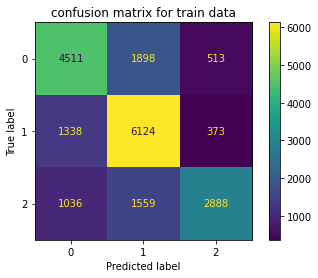

In [ ]:
acc_test = accuracy_score(sentiment_train,y_pred_bool)
f1_test = f1_score(sentiment_train, y_pred_bool, average="macro")
pre_test = precision_score(sentiment_train, y_pred_bool, average="macro")
recall_test = recall_score(sentiment_train, y_pred_bool, average="macro")
print(f"accuracy score on train data: {acc_test}")
print(f"f1 score on train data: {f1_test}")
print(f"precision score on train data: {pre_test}")
print(f"recall score on train data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(sentiment_train, y_pred_bool)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2])

cm_display.plot()
plt.title('confusion matrix for train data')

In [ ]:
y_pred = model3.predict(array_dev, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

80/80 [==============================] - 1s 9ms/step


accuracy score on validation data: 0.4641516887221015
f1 score on validation data: 0.4423747759117795
precision score on validation data: 0.4847515414573676
recall score on validation data: 0.4498514247835104


Text(0.5, 1.0, 'confusion matrix for validation data')

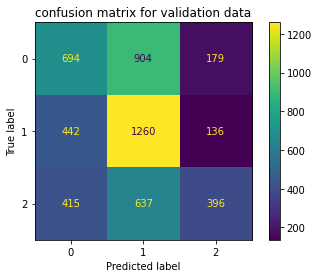

In [ ]:
acc_test = accuracy_score(sentiment_dev,y_pred_bool)
f1_test = f1_score(sentiment_dev, y_pred_bool, average="macro")
pre_test = precision_score(sentiment_dev, y_pred_bool, average="macro")
recall_test = recall_score(sentiment_dev, y_pred_bool, average="macro")
print(f"accuracy score on validation data: {acc_test}")
print(f"f1 score on validation data: {f1_test}")
print(f"precision score on validation data: {pre_test}")
print(f"recall score on validation data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(sentiment_dev, y_pred_bool)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.title('confusion matrix for validation data')

In [ ]:
y_pred = model3.predict(array_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

80/80 [==============================] - 1s 8ms/step


accuracy score on test data: 0.48352082099861854
f1 score on test data: 0.4521658687453854
precision score on test data: 0.48815035352957253
recall score on test data: 0.45750256482503154


Text(0.5, 1.0, 'confusion matrix for test data')

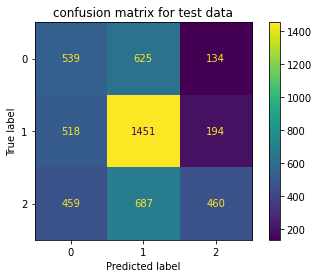

In [ ]:
acc_test = accuracy_score(sentiment_test,y_pred_bool)
f1_test = f1_score(sentiment_test, y_pred_bool, average="macro")
pre_test = precision_score(sentiment_test, y_pred_bool, average="macro")
recall_test = recall_score(sentiment_test, y_pred_bool, average="macro")
print(f"accuracy score on test data: {acc_test}")
print(f"f1 score on test data: {f1_test}")
print(f"precision score on test data: {pre_test}")
print(f"recall score on test data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(sentiment_test, y_pred_bool)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.title('confusion matrix for test data')

now lets try making embedding learnable and only initialize values from our wrod2vec like embedding and make it learnable and compare results

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Bidirectional
from sklearn.model_selection import train_test_split


e = Embedding(vocab_size, 201, weights=[embedding_matrix], trainable=True)
model3 = Sequential()
model3.add(e)
model3.add(LSTM(64,return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model3.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(3,activation='softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model3.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 201)         2052210   
                                                                 
 lstm_10 (LSTM)              (None, None, 64)          68096     
                                                                 
 lstm_11 (LSTM)              (None, 16)                5184      
                                                                 
 dense_6 (Dense)             (None, 3)                 51        
                                                                 
Total params: 2,125,541
Trainable params: 2,125,541
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 64
model3.fit(array_train, sentiment_train_1hot,validation_data=(array_dev, sentiment_dev_1hot),epochs = 30, batch_size=batch_size, verbose = 1)

Epoch 1/30
317/317 [==============================] - 42s 119ms/step - loss: 1.0289 - accuracy: 0.4675 - val_loss: 1.0334 - val_accuracy: 0.4768
Epoch 2/30
317/317 [==============================] - 40s 126ms/step - loss: 0.8724 - accuracy: 0.6077 - val_loss: 1.0373 - val_accuracy: 0.4821
Epoch 3/30
317/317 [==============================] - 38s 120ms/step - loss: 0.7496 - accuracy: 0.6838 - val_loss: 1.1391 - val_accuracy: 0.4766
Epoch 4/30
317/317 [==============================] - 37s 118ms/step - loss: 0.6645 - accuracy: 0.7221 - val_loss: 1.2282 - val_accuracy: 0.4851
Epoch 5/30
317/317 [==============================] - 39s 124ms/step - loss: 0.6008 - accuracy: 0.7411 - val_loss: 1.4678 - val_accuracy: 0.4782
Epoch 6/30
317/317 [==============================] - 37s 118ms/step - loss: 0.5531 - accuracy: 0.7585 - val_loss: 1.4821 - val_accuracy: 0.4815
Epoch 7/30
317/317 [==============================] - 38s 119ms/step - loss: 0.5212 - accuracy: 0.7659 - val_loss: 1.5570 - val_ac

In [ ]:
y_pred = model3.predict(array_train, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

317/317 [==============================] - 6s 16ms/step


accuracy score on train data: 0.8992094861660079
f1 score on train data: 0.8983027085514391
precision score on train data: 0.90162246983371
recall score on train data: 0.8960839296896107


Text(0.5, 1.0, 'confusion matrix for train data')

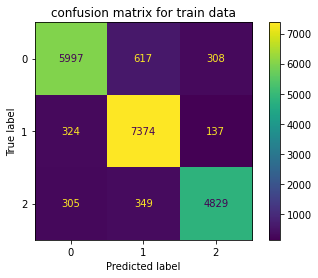

In [ ]:
acc_test = accuracy_score(sentiment_train,y_pred_bool)
f1_test = f1_score(sentiment_train, y_pred_bool, average="macro")
pre_test = precision_score(sentiment_train, y_pred_bool, average="macro")
recall_test = recall_score(sentiment_train, y_pred_bool, average="macro")
print(f"accuracy score on train data: {acc_test}")
print(f"f1 score on train data: {f1_test}")
print(f"precision score on train data: {pre_test}")
print(f"recall score on train data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(sentiment_train, y_pred_bool)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2])

cm_display.plot()
plt.title('confusion matrix for train data')

In [ ]:
y_pred = model3.predict(array_dev, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

80/80 [==============================] - 1s 9ms/step


accuracy score on validation data: 0.4765949042069919
f1 score on validation data: 0.4683589865663042
precision score on validation data: 0.4751294850328606
recall score on validation data: 0.4722873557145481


Text(0.5, 1.0, 'confusion matrix for validation data')

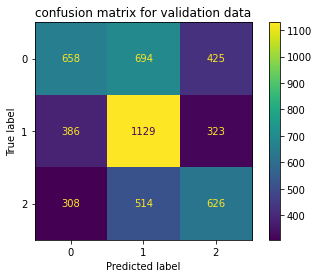

In [ ]:
acc_test = accuracy_score(sentiment_dev,y_pred_bool)
f1_test = f1_score(sentiment_dev, y_pred_bool, average="macro")
pre_test = precision_score(sentiment_dev, y_pred_bool, average="macro")
recall_test = recall_score(sentiment_dev, y_pred_bool, average="macro")
print(f"accuracy score on validation data: {acc_test}")
print(f"f1 score on validation data: {f1_test}")
print(f"precision score on validation data: {pre_test}")
print(f"recall score on validation data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(sentiment_dev, y_pred_bool)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.title('confusion matrix for validation data')

In [ ]:
y_pred = model3.predict(array_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

80/80 [==============================] - 2s 19ms/step


accuracy score on test data: 0.49457272547858694
f1 score on test data: 0.4758987712567499
precision score on test data: 0.47991475665239464
recall score on test data: 0.47496324464502254


Text(0.5, 1.0, 'confusion matrix for test data')

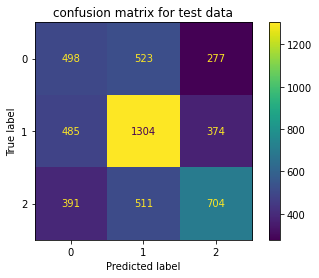

In [ ]:
acc_test = accuracy_score(sentiment_test,y_pred_bool)
f1_test = f1_score(sentiment_test, y_pred_bool, average="macro")
pre_test = precision_score(sentiment_test, y_pred_bool, average="macro")
recall_test = recall_score(sentiment_test, y_pred_bool, average="macro")
print(f"accuracy score on test data: {acc_test}")
print(f"f1 score on test data: {f1_test}")
print(f"precision score on test data: {pre_test}")
print(f"recall score on test data: {recall_test}")
confusion_matrix = metrics.confusion_matrix(sentiment_test, y_pred_bool)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])

cm_display.plot()
plt.title('confusion matrix for test data')

as we can see, results are pretty close even we fine tune whole embedding, which show that our initial values for them (our word2vec like vector) is somewhat good, it couldn't increase our perfromance compared to previous part (all of them are have nearly same values, we can easilly get high acuracy for train data (even more than 90 percent) but for test and validation accuracy will remain near 50 percent.